In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import warnings
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn import linear_model
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split #we need the train_test split 
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline




In [18]:
data = pd.read_csv('breach.csv')
data.head(50)


,date_made_public,company,city,state,type_of_breach,type_of_organization,total_records,information_source,year_of_breach,latitude,longitude
0,3/3/2006,PayDay OK LLC,Princeton,NJ,HACK,BSF,88.0,California Attorney General,2006,40.058324,-74.405661
1,1/4/2012,"SF Fire Credit Union, Pacifica-Coastside Credi...",San Francisco,CA,PORT,BSF,0.0,California Attorney General,2012,37.774930,-122.419416
2,2/18/2012,"BDO USA, Rubio's Restaurants, Inc.",San Diego,CA,PORT,BSR,0.0,California Attorney General,2012,32.715329,-117.157255
3,2/22/2012,"DHI Mortgage Company, Ltd.",Austin,TX,HACK,BSF,0.0,California Attorney General,2012,30.267153,-97.743061
4,3/12/2012,"Impairment Resources, LLC",San Diego,CA,PORT,MED,14000.0,California Attorney General,2012,32.715329,-117.157255
5,3/14/2012,"RJL Insurance Services, LLC, RJL Wealth Manage...",San Diego,CA,DISC,BSF,0.0,California Attorney General,2012,32.715329,-117.157255
6,3/19/2012,Kaiser Foundation Health Plan,Oakland,CA,DISC,MED,30000.0,California Attorney General,2012,37.804364,-122.271114
7,3/19/2012,"IndyMac Bank, IndyMac Resources, Inc.",Dallas,TX,DISC,BSF,0.0,California Attorney General,2012,32.802955,-96.769923
8,3/23/2012,Manhattan Prep,New York,NY,HACK,BSR,0.0,California Attorney General,2012,40.714353,-74.005973
9,3/31/2012,St. Joseph's Medical Center,Stockton,CA,PHYS,MED,712.0,California Attorney General,2012,37.957702,-121.290780


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date_made_public      9015 non-null   object 
 1   company               9015 non-null   object 
 2   city                  9011 non-null   object 
 3   state                 9007 non-null   object 
 4   type_of_breach        9015 non-null   object 
 5   type_of_organization  9015 non-null   object 
 6   total_records         9015 non-null   float64
 7   information_source    9015 non-null   object 
 8   year_of_breach        9015 non-null   int64  
 9   latitude              9015 non-null   float64
 10  longitude             9015 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 774.9+ KB


In [4]:
data.columns=[e.lower().replace(' ', '_') for e in data.columns]  
data.columns

Index(['date_made_public', 'company', 'city', 'state', 'type_of_breach',
       'type_of_organization', 'total_records', 'description_of_incident',
       'information_source', 'source_url', 'year_of_breach', 'latitude',
       'longitude', 'unnamed:_13', 'unnamed:_14', 'unnamed:_15'],
      dtype='object')

In [5]:
data.drop(['unnamed:_13', 'unnamed:_14','unnamed:_15','description_of_incident','source_url'], axis=1, inplace= True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date_made_public      9015 non-null   object 
 1   company               9015 non-null   object 
 2   city                  5690 non-null   object 
 3   state                 8436 non-null   object 
 4   type_of_breach        8926 non-null   object 
 5   type_of_organization  9015 non-null   object 
 6   total_records         9009 non-null   object 
 7   information_source    8962 non-null   object 
 8   year_of_breach        9015 non-null   int64  
 9   latitude              6541 non-null   float64
 10  longitude             6541 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 774.9+ KB


In [7]:
n = data.nunique(axis=0) 
  
print("No.of.unique values in each column :\n", 
      n)

No.of.unique values in each column :
 date_made_public        3331
company                 7669
city                    1550
state                    117
type_of_breach             8
type_of_organization       8
total_records           3393
information_source        18
year_of_breach            15
latitude                2443
longitude               2442
dtype: int64


In [8]:
data.isnull().sum()


date_made_public           0
company                    0
city                    3325
state                    579
type_of_breach            89
type_of_organization       0
total_records              6
information_source        53
year_of_breach             0
latitude                2474
longitude               2474
dtype: int64

In [9]:
data.head(50)

,date_made_public,company,city,state,type_of_breach,type_of_organization,total_records,information_source,year_of_breach,latitude,longitude
0,3/3/2006,PayDay OK LLC,NaN,New Jersey,HACK,BSF,88,California Attorney General,2006,40.058324,-74.405661
1,1/4/2012,"SF Fire Credit Union, Pacifica-Coastside Credi...",San Francisco,California,PORT,BSF,0,California Attorney General,2012,37.774930,-122.419416
2,2/18/2012,"BDO USA, Rubio's Restaurants, Inc.",San Diego,California,PORT,BSR,0,California Attorney General,2012,32.715329,-117.157255
3,2/22/2012,"DHI Mortgage Company, Ltd.",Austin,Texas,HACK,BSF,0,California Attorney General,2012,30.267153,-97.743061
4,3/12/2012,"Impairment Resources, LLC",San Diego,California,PORT,MED,"14,000",California Attorney General,2012,32.715329,-117.157255
5,3/14/2012,"RJL Insurance Services, LLC, RJL Wealth Manage...",San Diego,California,DISC,BSF,0,California Attorney General,2012,32.715329,-117.157255
6,3/19/2012,Kaiser Foundation Health Plan,Oakland,California,DISC,MED,"30,000",California Attorney General,2012,37.804364,-122.271114
7,3/19/2012,"IndyMac Bank, IndyMac Resources, Inc.",Dallas,Texas,DISC,BSF,0,California Attorney General,2012,32.802955,-96.769923
8,3/23/2012,Manhattan Prep,New York,New York,HACK,BSR,0,California Attorney General,2012,40.714353,-74.005973
9,3/31/2012,St. Joseph's Medical Center,Stockton,California,PHYS,MED,712,California Attorney General,2012,37.957702,-121.290780


#my target is type of breach 


fatturato
zone geografiche
piattaforme
tipo di frodi


In [10]:
duplicateRowsDF = data[data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
     date_made_public                                        company  \
510         11/4/2016                                   Welk Resorts   
5053        7/24/2013                                         Tinder   
6041        2/21/2012                         Ochsner Medical Center   
6412        2/15/2018                      Balasa Dinverno Foltz LLC   
6547        8/15/2019                       Fairfield Medical Center   
7099        4/13/2017                       Area Agency of Aging 1-B   
7487        2/26/2016        Ecolab Health and Welfare Benefits Plan   
8415       11/21/2012  Original Medicine Acupuncture & Wellness, LLC   

                city       state type_of_breach type_of_organization  \
510        Escondido  California           PHYS                  BSO   
5053  West Hollywood  California           DISC                  BSO   
6041     New Orleans   Louisiana           PORT                  MED 

In [11]:
nulls = pd.DataFrame(data.isna().sum()/len(data))
nulls= nulls.reset_index()

In [12]:
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
2,city,0.368830
9,latitude,0.274432
10,longitude,0.274432
3,state,0.064226
4,type_of_breach,0.009872
7,information_source,0.005879
6,total_records,0.000666
0,date_made_public,0.000000
1,company,0.000000
5,type_of_organization,0.000000


Data to fix with null values:

More than 25%:

2	city	0.368830

9	latitude	0.274432

10	longitude	0.274432

Less than 25% but still to fix:

3	state	0.064226

4	type_of_breach	0.009872

7	information_source	0.005879

6	total_records	0.000666

In [13]:
data['state'].unique()

array(['New Jersey', 'California', 'Texas', 'New York', 'Illinois',
       'Michigan', 'Connecticut', 'Maryland', 'Delaware', 'Georgia',
       'Oregon', 'Florida', 'Ohio', 'Nebraska', 'Minnesota',
       'Massachusetts', 'Colorado', 'Kentucky', 'District Of Columbia',
       'Nevada', 'North Carolina', 'Missouri', nan, 'Indiana', 'Alaska',
       'Pennsylvania', 'Virginia', 'New Mexico', 'Hawaii', 'Tennessee',
       'Vermont', 'Utah', 'Arizona', 'Kansas', 'Alabama', 'Washington',
       'Ontario', 'Iowa', 'South Carolina', 'Wisconsin', 'Quebec',
       'Grand Bahama', 'Louisiana', 'Buckinghamshire', 'Wyoming',
       'New Hampshire', 'Cheshire', 'Oklahoma', 'British Columbia',
       'Noord Holland', 'Mississippi', 'Arkansas', 'Rhode Island',
       'Maine', 'Montana', 'London', 'Idaho', 'West Virginia',
       'South Dakota', 'North Dakota', 'Puerto Rico', 'Tokyo', 'Beijing',
       'Berlin', 'Dublin', 'Guangdong', 'VA', 'CA', 'MO', 'CT', 'OH',
       'FL', 'PA', 'WI', 'MI', 'CO', '

In [14]:
def clean(x):    
    if x in ['Washington', 'WA']:
        return 'WA'
    elif x in ['Arizona','AZ']:
        return 'AZ'
    elif x in ['California','CA']:
        return 'CA'
    elif x in ['Nevada','NV']:
        return 'NV'
    elif x in ['Oregon','OR']:
        return 'OR'
    elif x in ['New Jersey','NJ']:
        return 'NJ'
    elif x in ['Texas','TX']:
        return 'TX'
    elif x in ['Illinois','IL']:
        return 'IL'
    elif x in ['Michigan','MI']:
        return 'MI'
    elif x in ['Connecticut','CT']:
        return 'CT'
    elif x in ['Delaware','DE']:
        return 'DE'
    elif x in ['Maryland','MD']:
        return 'MD'
    elif x in ['Georgia','GA']:
        return 'GA'
    elif x in ['Florida','FL']:
        return 'FL'
    elif x in ['Ohio','OH']:
        return 'OH'
    elif x in ['Nebraska','IL']:
        return 'IL'
    elif x in ['Minnesota','MN']:
        return 'MN'
    elif x in ['Massachusetts','MA']:
        return 'MA'
    elif x in ['Colorado','CO']:
        return 'CO'
    elif x in ['Kentucky','KY']:
        return 'KY'
    elif x in ['District Of Columbia','DC']:
        return 'DC'
    elif x in ['Nevada','NV']:
        return 'NV'
    elif x in ['North Carolina','NC']:
        return 'NC'
    elif x in ['Missouri','MO']:
        return 'MO'
    elif x in ['Indiana','IN']:
        return 'IN'
    elif x in ['Alaska','AK']:
        return 'AK'
    elif x in ['Pennsylvania','PA']:
        return 'PA'
    elif x in ['Virginia','VA']:
        return 'VA'
    elif x in ['New Mexico','NM']:
        return 'NM'
    elif x in ['Hawaii','HI']:
        return 'HI'
    elif x in ['Tennessee','TN']:
        return 'TN'
    elif x in ['Vermont','VT']:
        return 'VT'
    elif x in ['Utah','UT']:
        return 'UT'
    elif x in ['Kansas','KS']:
        return 'KS'
    elif x in ['Alabama','AL']:
        return 'AL'
    elif x in ['Ontario','ON']:
        return 'ON'
    elif x in ['Iowa','IA']:
        return 'IA'
    elif x in ['South Carolina','SC']:
        return 'SC'
    elif x in ['Wisconsin','WI']:
        return 'WI'
    elif x in ['Quebec','QC']:
        return 'QC'
    elif x in ['Louisiana','LA']:
        return 'LA'
    elif x in ['Wyoming','WY']:
        return 'WY'
    elif x in ['New Hampshire','NH']:
        return 'NH'
    elif x in ['Oklahoma','OK']:
        return 'OK'
    elif x in ['Mississippi','MS']:
        return 'MS'
    elif x in ['Arkansas','AR']:
        return 'AR'
    elif x in ['Rhode Island','RI']:
        return 'RI'
    elif x in ['Maine','ME']:
        return 'ME'
    elif x in ['Montana','MT']:
        return 'MT'
    elif x in ['Idaho','ID']:
        return 'ID'
    elif x in ['West Virginia','WV']:
        return 'WV'
    elif x in ['South Dakota','SD']:
        return 'SD'
    elif x in ['North Dakota','ND']:
        return 'ND'
    elif x in ['Puerto Rico','PR']:
        return 'PR'
    elif x in ['Grand Bahama']:
        return 'Bahamas'
    elif x in ['Buckinghamshire ','Cheshire']:
        return 'UK'
    elif x in ['British Columbia']:
        return 'Canada'
    elif x in ['Noord Holland']:
        return 'Netherlands '
    elif x in ['Tokyo']:
        return 'Japan'
    elif x in ['Beijing','Guangdong']:
        return 'China'
    elif x in ['Berlin']:
        return 'Germany'
    elif x in ['Dublin']:
        return 'Ireland'
   


In [15]:
data['state'] = list(map(clean, data['state']))

In [16]:
data['state'].value_counts(sorted).reset_index()

,index,state
0,CA,0.171604
1,TX,0.074516
2,FL,0.058741
3,IL,0.047326
4,MD,0.043991
5,PA,0.035783
6,OH,0.034116
7,GA,0.032705
8,MA,0.031807
9,IN,0.027703


In [17]:
data['state'].isna().sum()

1218

In [18]:
state = data.dropna(subset=['state']).drop_duplicates('city').set_index('city')['state']
data['state'] = data['state'].fillna(data['city'].map(state))

In [19]:
data['state'].isna().sum()

441

In [20]:
data2 = data[data.isna().any(axis=1)]
print (data2)

     date_made_public                                            company  \
0            3/3/2006                                      PayDay OK LLC   
8           3/23/2012                                     Manhattan Prep   
12          3/31/2012                      Opening Ceremony Online, LLC.   
57         10/24/2012                                     Barnes & Noble   
59         10/30/2012                 HSBC Bank USA National Association   
...               ...                                                ...   
9010       11/20/2009                                  Mark D. Lurie, MD   
9011       11/17/2009  Health Services for Children with Special Need...   
9012       10/30/2009    Alaska Department of Health and Social Services   
9013       10/28/2009          Mid America Kidney Stone Association, LLC   
9014       10/21/2009                         Brooke Army Medical Center   

          city state type_of_breach type_of_organization total_records  \
0          Na

In [21]:
#most = data['state'].value_counts(sorted).reset_index().iloc[0,0]

In [22]:
#data['state'] = data['state'].fillna(most)

In [23]:
data['state'].isna().sum()

441

In [24]:
data['type_of_breach'].value_counts(sorted).reset_index()

,index,type_of_breach
0,HACK,0.283778
1,DISC,0.208492
2,PHYS,0.194152
3,PORT,0.131302
4,UNKN,0.078871
5,INSD,0.067892
6,STAT,0.027896
7,CARD,0.007618


In [25]:
data['type_of_breach'].isna().sum()

89

In [26]:
most1 = data['type_of_breach'].value_counts(sorted).reset_index().iloc[0,0]

In [27]:
data['type_of_breach'] = data['type_of_breach'].fillna(most1)

In [28]:
data['type_of_breach'].isna().sum()

0

In [29]:
data.isnull().sum()


date_made_public           0
company                    0
city                    3325
state                    441
type_of_breach             0
type_of_organization       0
total_records              6
information_source        53
year_of_breach             0
latitude                2474
longitude               2474
dtype: int64

In [30]:
data['information_source'].value_counts(sorted).reset_index()

,index,information_source
0,US Department of Health and Human Services,0.276054
1,Dataloss DB,0.196050
2,Media,0.118612
3,Databreaches.net,0.094956
4,California Attorney General,0.081009
5,PHIPrivacy.net,0.061593
6,Indiana Attorney General,0.055680
7,Maryland Attorney General,0.034702
8,Government Agency,0.028007
9,HHS via PHIPrivacy.net,0.024102


In [31]:
data["information_source"].fillna("Unknown", inplace = True) 


In [32]:
data['information_source'].value_counts(sorted).reset_index()

,index,information_source
0,US Department of Health and Human Services,0.274432
1,Dataloss DB,0.194897
2,Media,0.117915
3,Databreaches.net,0.094398
4,California Attorney General,0.080532
5,PHIPrivacy.net,0.061231
6,Indiana Attorney General,0.055352
7,Maryland Attorney General,0.034498
8,Government Agency,0.027842
9,HHS via PHIPrivacy.net,0.023960


In [33]:
data.isnull().sum()


date_made_public           0
company                    0
city                    3325
state                    441
type_of_breach             0
type_of_organization       0
total_records              6
information_source         0
year_of_breach             0
latitude                2474
longitude               2474
dtype: int64

In [34]:
data['total_records'].value_counts(sorted).reset_index()

,index,total_records
0,0,0.242757
1,500,0.014763
2,1,0.012987
3,"2,000",0.005772
4,100,0.005439
...,...,...
3388,"7,500,000",0.000111
3389,"1,313",0.000111
3390,"2,772",0.000111
3391,"3,900,000",0.000111


In [35]:
data['total_records'].unique

<bound method Series.unique of 0           88
1            0
2            0
3            0
4       14,000
         ...  
9010      5166
9011      3800
9012       501
9013      1000
9014      1000
Name: total_records, Length: 9015, dtype: object>

In [36]:
data['total_records'] = data['total_records'].str.replace(",","").astype(float)


In [37]:
data['total_records'].unique

<bound method Series.unique of 0          88.0
1           0.0
2           0.0
3           0.0
4       14000.0
         ...   
9010     5166.0
9011     3800.0
9012      501.0
9013     1000.0
9014     1000.0
Name: total_records, Length: 9015, dtype: float64>

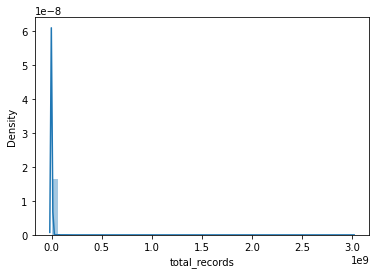

In [38]:
sns.distplot(data[data['total_records'].isna()==False]['total_records']) 
plt.show()

In [39]:
data['total_records'] = data['total_records'].fillna(np.mean(data['total_records']))

In [40]:
data.isnull().sum()


date_made_public           0
company                    0
city                    3325
state                    441
type_of_breach             0
type_of_organization       0
total_records              0
information_source         0
year_of_breach             0
latitude                2474
longitude               2474
dtype: int64

In [41]:
city = data.dropna(subset=['city']).drop_duplicates('state').set_index('state')['city']
data['city'] = data['city'].fillna(data['state'].map(city))

In [42]:
data.isnull().sum()


date_made_public           0
company                    0
city                       4
state                    441
type_of_breach             0
type_of_organization       0
total_records              0
information_source         0
year_of_breach             0
latitude                2474
longitude               2474
dtype: int64

In [43]:
data['city'].unique()

array(['Princeton', 'San Francisco', 'San Diego', ..., 'Carle Place',
       'Ft. Meyers', 'Boonville'], dtype=object)

In [44]:
data['city'].value_counts(sorted).reset_index()

,index,city
0,Princeton,0.085340
1,San Francisco,0.049384
2,New York,0.028743
3,Austin,0.028521
4,Silver Spring,0.025968
...,...,...
1545,Wakefield,0.000111
1546,Seneca,0.000111
1547,Wilsonville,0.000111
1548,Marlboro,0.000111


In [45]:
latitude = data.dropna(subset=['latitude']).drop_duplicates('city').set_index('city')['latitude']
data['latitude'] = data['latitude'].fillna(data['city'].map(latitude))

In [46]:
data.isnull().sum()


date_made_public           0
company                    0
city                       4
state                    441
type_of_breach             0
type_of_organization       0
total_records              0
information_source         0
year_of_breach             0
latitude                   0
longitude               2474
dtype: int64

In [47]:
longitude = data.dropna(subset=['longitude']).drop_duplicates('city').set_index('city')['longitude']
data['longitude'] = data['longitude'].fillna(data['city'].map(longitude))

In [48]:
data.isnull().sum()


date_made_public          0
company                   0
city                      4
state                   441
type_of_breach            0
type_of_organization      0
total_records             0
information_source        0
year_of_breach            0
latitude                  0
longitude                 0
dtype: int64

In [53]:
state1 = data.dropna(subset=['state']).drop_duplicates('latitude').set_index('latitude')['state']
data['state'] = data['state'].fillna(data['latitude'].map(state1))

In [54]:
data.isnull().sum()


date_made_public          0
company                   0
city                      4
state                   272
type_of_breach            0
type_of_organization      0
total_records             0
information_source        0
year_of_breach            0
latitude                  0
longitude                 0
dtype: int64

In [56]:
state2 = data.dropna(subset=['state']).drop_duplicates('city').set_index('city')['state']
data['state'] = data['state'].fillna(data['city'].map(state2))

In [57]:
data.isnull().sum()


date_made_public          0
company                   0
city                      4
state                   153
type_of_breach            0
type_of_organization      0
total_records             0
information_source        0
year_of_breach            0
latitude                  0
longitude                 0
dtype: int64

In [59]:
state3 = data.dropna(subset=['state']).drop_duplicates('longitude').set_index('longitude')['state']
data['state'] = data['state'].fillna(data['longitude'].map(state3))

In [ ]:
#  https://towardsdatascience.com/pythons-geocoding-convert-a-list-of-addresses-into-a-map-f522ef513fd6

In [60]:
data.isnull().sum()


date_made_public          0
company                   0
city                      4
state                   152
type_of_breach            0
type_of_organization      0
total_records             0
information_source        0
year_of_breach            0
latitude                  0
longitude                 0
dtype: int64

In [70]:
data.to_csv(r'breach.csv', index = False)


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date_made_public      9015 non-null   object 
 1   company               9015 non-null   object 
 2   city                  9011 non-null   object 
 3   state                 8574 non-null   object 
 4   type_of_breach        9015 non-null   object 
 5   type_of_organization  9015 non-null   object 
 6   total_records         9015 non-null   float64
 7   information_source    9015 non-null   object 
 8   year_of_breach        9015 non-null   int64  
 9   latitude              9015 non-null   float64
 10  longitude             9015 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 774.9+ KB


In [61]:
data[data.isna().any(axis=1)] 

,date_made_public,company,city,state,type_of_breach,type_of_organization,total_records,information_source,year_of_breach,latitude,longitude
78,12/20/2012,"Jetro, Restaurant Depot",College Point,NaN,CARD,BSR,0.0,California Attorney General,2012,40.786395,-73.838966
110,3/22/2013,"OCS America, Inc.",Long Island City,NaN,HACK,BSF,0.0,California Attorney General,2013,40.744679,-73.948542
175,12/30/2013,T-Mobile Supplier,Unknown,NaN,HACK,BSO,0.0,California Attorney General,2013,46.498432,-116.724759
250,8/12/2014,"Freedom Management Group, LLC dba The Natural",Hauppauge,NaN,HACK,BSR,0.0,California Attorney General,2014,40.809529,-73.258768
342,8/12/2015,ICANN.org,"Los Angeles, CA 90094-2536",NaN,HACK,NGO,0.0,California Attorney General,2015,33.982885,-118.404731
...,...,...,...,...,...,...,...,...,...,...,...
6293,12/6/2014,WellCare Health Plans,Monroe County,NaN,DISC,MED,47.0,PHIPrivacy.net,2014,43.284125,-77.745208
6321,11/19/2013,Sachem Central School District,Lake Ronkonkoma,NaN,HACK,EDU,15000.0,Security Breach Letter,2013,40.832098,-73.105371
6393,2/13/2018,Central Islip Union Free School District,Central Islip,NaN,DISC,EDU,1362.0,Security Breach Letter,2018,40.790654,-73.201781
6475,1/13/2016,HSBC SBN,Depew,NaN,DISC,BSF,0.0,Vermont Attorney General,2016,42.909337,-78.727082


In [62]:
data1 = data[data.isna().any(axis=1)] #replace NaN with specific values
print (data1)

     date_made_public                                        company  \
78         12/20/2012                        Jetro, Restaurant Depot   
110         3/22/2013                              OCS America, Inc.   
175        12/30/2013                              T-Mobile Supplier   
250         8/12/2014  Freedom Management Group, LLC dba The Natural   
342         8/12/2015                                      ICANN.org   
...               ...                                            ...   
6293        12/6/2014                          WellCare Health Plans   
6321       11/19/2013                 Sachem Central School District   
6393        2/13/2018       Central Islip Union Free School District   
6475        1/13/2016                                       HSBC SBN   
6527         3/8/2016                                  1-800-Flowers   

                            city state type_of_breach type_of_organization  \
78                 College Point   NaN           CARD    

In [52]:
#data.city.replace(np.NaN, ['Bahamas','London','Tokyo','Dublin'], inplace=True)

#data['city'] = data.city.replace(np.NaN, ['Bahamas','London','Tokyo','Dublin'])

# Or without `replace` :
#data['city'] = data.Acityge.apply(lambda x: x if not pd.isnull(x) else ['Bahamas','London','Tokyo','Dublin'])

TypeError: Invalid "to_replace" type: 'float'

In [ ]:
#data['city'] = data['city'].replace(['NaN','NaN','NaN','NaN'],['Bahamas','London','Tokyo','Dublin'])


In [ ]:
data.info()

In [ ]:
data

In [ ]:
# qcut to bucket 'other' ask to Ignacio if you do not remember because otherwise
# what might happen is that we provide too much weight to other as a class 

In [ ]:
cat = data.select_dtypes('object')
num = data.select_dtypes(np.number)

In [ ]:
for i in cat:
    print(str(i) + ' ' + str(len(data[i].unique())))

In [ ]:
for i in num:
    print(str(i) + ' ' + str(len(data[i].unique())))

In [ ]:
data = data.set_index("company")


In [ ]:
data.head()

In [ ]:
data['date_made_public'] = pd.to_datetime(data.date_made_public)


In [ ]:
data['date_made_public']


In [ ]:
data.info()

In [ ]:
from itertools import combinations
from scipy.stats import chi2_contingency



def data_corr_mat(df,confidence):
    columns = df.columns
    chi = pd.DataFrame(index=columns, columns=columns)
    p = pd.DataFrame(index=columns, columns=columns)
    nh = pd.DataFrame(index=columns, columns=columns)
    dof = pd.DataFrame(index=columns, columns=columns)
    for var1, var2 in combinations(columns, 2):
        cont_table = pd.crosstab(df[var1], df[var2], margins=False)
        chi2_stat= chi2_contingency(cont_table)[0]
        p_stat= chi2_contingency(cont_table)[1]
        chi.loc[var2, var1] = chi2_stat
        chi.loc[var1, var2] = chi2_stat
        p.loc[var2, var1] = p_stat
        p.loc[var1, var2] = p_stat
        dof_stat= chi2_contingency(cont_table)[2]
        dof.loc[var2, var1] = dof_stat
        dof.loc[var1, var2] = dof_stat
        if p.loc[var2, var1] < confidence:
            nh.loc[var2, var1]='rejected'
        else:
            nh.loc[var2, var1]='accepted'
        if p.loc[var1, var2] < confidence:
            nh.loc[var1, var2]='rejected'
        else:
            nh.loc[var1, var2]='accepted'   
    chi.fillna(0, inplace=True)
    p.fillna(0, inplace=True)
    return chi,p,nh,dof

chi,p,nh,dof=data_corr_mat(cat,.05) 

In [ ]:
nh

In [ ]:
p

In [ ]:
corr_matrix=num.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
# longitude, year of breach

In [ ]:
data

In [ ]:
data.columns

In [ ]:
data['type_of_organization'].value_counts(dropna=False)  


In [ ]:
data['year_of_breach'].value_counts(dropna=False)  
